#主成分分析(PCA: Principal Component Analysis)
圓川隆夫『多変量のデータ解析』(1988年, 朝倉書店)第4章「主成分分析と正準相関分析」をPythonで実行します。

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# データの読み込み
data = pd.read_csv("data/tab47.csv")
data.head()

,国語,社会,数学,理科,音楽,美術,保体,技家,英語
0,55,59,38,66,29,32,29,36,61
1,36,49,35,57,63,62,55,66,45
2,53,58,16,41,67,64,50,50,48
3,78,80,42,65,85,75,69,76,70
4,6,19,38,59,49,47,43,57,26


In [3]:
# 要約統計量
data.describe()

,国語,社会,数学,理科,音楽,美術,保体,技家,英語
count,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,48.100000,55.400000,45.15000,64.45000,64.250000,60.000000,53.800000,63.900000,53.600000
std,17.728657,16.252611,16.10255,13.65544,14.219612,10.833671,11.171392,13.637796,14.680456
min,6.000000,19.000000,16.00000,41.00000,29.000000,32.000000,29.000000,36.000000,26.000000
25%,37.000000,44.500000,35.00000,55.50000,56.500000,52.250000,48.750000,55.250000,45.000000
50%,51.500000,55.000000,45.50000,66.00000,65.500000,62.000000,53.000000,65.000000,51.500000
75%,57.250000,66.750000,56.25000,72.00000,73.250000,67.750000,63.000000,75.250000,63.750000
max,78.000000,80.000000,79.00000,91.00000,85.000000,75.000000,70.000000,85.000000,80.000000


In [4]:
# 主成分分析
pca = PCA(5)
pca.fit(data)

PCA(copy=True, n_components=5, whiten=False)

　寄与率　：[ 0.52903904  0.2851391   0.16902858  0.00645329  0.00438465]
累積寄与率：[ 0.52903904  0.81417814  0.98320672  0.98966001  0.99404465]


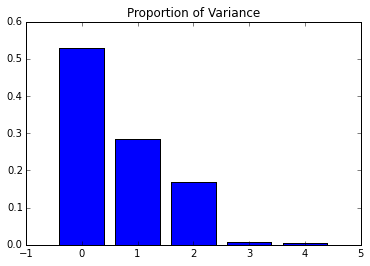

In [5]:
# 寄与率と累積寄与率
print('　寄与率　：' + str(pca.explained_variance_ratio_ ))
print('累積寄与率：' + str(np.cumsum(pca.explained_variance_ratio_)))
plt.bar(range(5), pca.explained_variance_ratio_ ,align="center")
plt.title('Proportion of Variance')

In [6]:
# 固有ベクトル(主成分軸の係数)
weight = pca.components_.T
pd.DataFrame(weight)

,0,1,2,3,4
0,-0.463553,-0.265949,0.433919,0.281457,-0.649347
1,-0.463749,-0.210552,0.276771,-0.041114,0.579257
2,-0.377548,0.065519,-0.593102,0.612361,0.114103
3,-0.343385,-0.037301,-0.460187,-0.272067,-0.159203
4,-0.139303,0.549883,0.244533,0.313006,0.219472
5,-0.116533,0.391324,0.252040,0.102468,-0.043249
6,-0.149104,0.421141,0.121070,-0.244846,0.054885
7,-0.250084,0.452668,-0.179654,-0.382967,-0.327357
8,-0.437995,-0.203666,0.036280,-0.393699,0.210312


In [7]:
# 主成分スコア
score = np.round(pca.fit_transform(data), 4)
pd.DataFrame(score)

,0,1,2,3,4
0,12.9065,-58.0407,-5.8808,-3.0650,-0.6548
1,17.9710,7.4812,2.0810,-5.2296,1.3867
2,21.2271,-6.5602,34.4407,-0.4691,2.3260
3,-41.3821,12.4601,30.5140,-1.4547,-1.3851
4,60.0309,3.0719,-29.6687,-3.2009,-0.6189
5,3.0987,21.4562,-7.1644,-0.7835,-4.5092
6,-39.2399,-15.8669,4.3747,1.2457,-0.8471
7,39.4415,15.7569,-13.6215,-0.9255,-2.4541
8,19.3620,-14.6117,21.4199,-3.9563,2.1186
9,-23.6717,-5.5149,0.7144,6.2791,2.4907


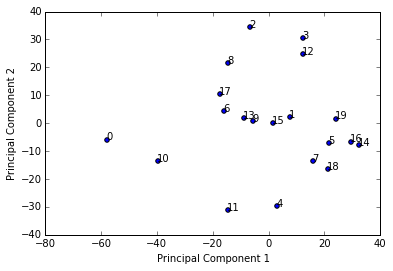

In [8]:
# 主成分スコアの配置
x = 1
y = 2
plt.scatter(score.T[x], score.T[y])
for i in range(len(data)):
    plt.text(score.T[x][i], score.T[y][i], str(i))
plt.xlabel('Principal Component %s' % x)
plt.ylabel('Principal Component %s' % y)